In [2]:
import pandas as pd  # This is for handling data like a table
import numpy as np   # This helps with math and numbers
from sklearn.model_selection import train_test_split  # To split data for training and testing
from sklearn.preprocessing import StandardScaler      # To scale (normalize) the data
from sklearn.linear_model import LogisticRegression   # Model 1: Logistic Regression
from sklearn.tree import DecisionTreeClassifier        # Model 2: Decision Tree
from sklearn.ensemble import RandomForestClassifier   # Model 3: Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve  # For evaluating models
import matplotlib.pyplot as plt  # For making charts
import seaborn as sns            # For nicer charts

# Load the dataset
data = pd.read_csv('heart_dataset.csv')  # Change 'heart.csv' if your file name is different

# Show the first 5 rows to check
print(data.head())

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  
0                   0            

In [5]:
# Check for missing values (should be none, but good to check)
print(data.isnull().sum())  # If any >0, we'll fix later

# In standard dataset, categories are numbers. If yours has strings (like in your sample), encode them.
# Use one-hot encoding for categorical features
data = pd.get_dummies(data, columns=['restecg', 'slope', 'thal'], drop_first=True)

# Separate features (X) and target (y)
# Based on the head of the dataframe, the target column seems to be the last one. Let's assume it's the last column.
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column is the target


# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (make numbers similar size for better model)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessed successfully!")

age                   0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalch                0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
sex_Female            0
sex_Male              0
cp_asymptomatic       0
cp_atypical angina    0
cp_non-anginal        0
cp_typical angina     0
dtype: int64
Data preprocessed successfully!


In [6]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  # Train it
y_pred_log = log_reg.predict(X_test)  # Predict on test

# Model 2: Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_tree = dec_tree.predict(X_test)

# Model 3: Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_forest = rand_forest.predict(X_test)

print("Models trained!")

Models trained!


Logistic Regression:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: nan

Decision Tree:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: nan

Random Forest:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: U

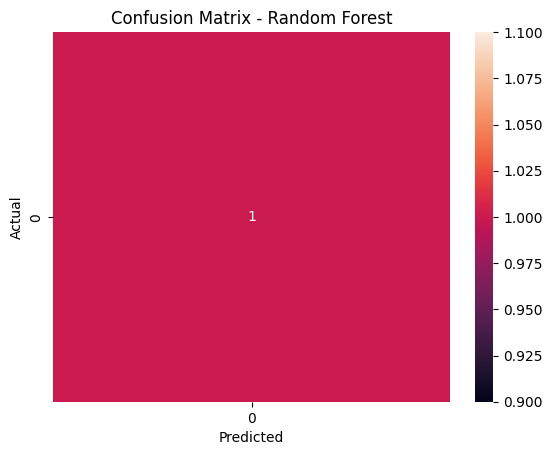

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


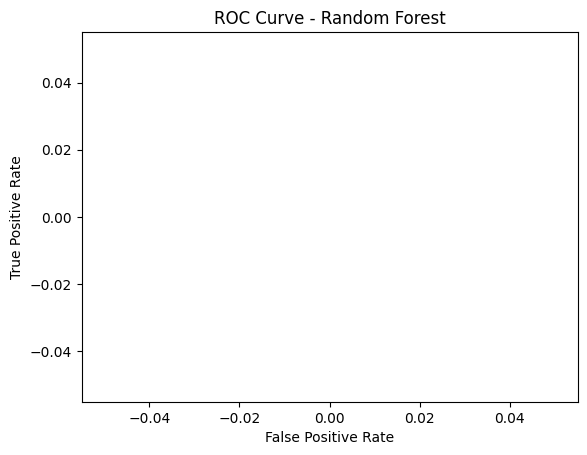

In [7]:
# Function to print metrics for a model
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))

# Evaluate each
print("Logistic Regression:")
evaluate_model(y_test, y_pred_log)
print("\nDecision Tree:")
evaluate_model(y_test, y_pred_tree)
print("\nRandom Forest:")
evaluate_model(y_test, y_pred_forest)

# Visualize Confusion Matrix for Random Forest (example)
cm = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rand_forest.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [12]:
sample_data = pd.read_csv('sample_heart_data.csv', dtype={
    'exang': bool,
    'restecg_normal': bool,
    'slope_flat': bool,
    'slope_upsloping': bool,
    'thal_normal': bool,
    'thal_reversable defect': bool
})

# Drop the last column from sample_data as it seems to be the extra column
sample_data = sample_data.iloc[:, :-1]

# Preprocess sample (encode strings if needed, scale)
# Assume it matches structure; add encoding if strings present
sample_data = scaler.transform(sample_data)  # Scale

# Predict with Random Forest
predictions = rand_forest.predict(sample_data)
print("Predictions for sample rows (1 = disease, 0 = no):", predictions)

Predictions for sample rows (1 = disease, 0 = no): [False False False]
